<a href="https://colab.research.google.com/github/DorianD6/NBHV-G4360-Intro-Theory-2021/blob/main/Assignment_4_3_2_Dongrui_Deng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 3-2: Stabilized Supralinear Network (SNN)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def SSN(c, theta_0, r_0):
  r_E = np.zeros([180,1000])
  r_I = np.zeros([180,1000])
  r = np.concatenate((r_E, r_I), axis=0)
  r[:, 0] = r_0
  Jdict = {'EE': 0.044,'IE': 0.042,'EI': -0.023,'II': -0.018} # Attention to the minus sign!
  sigma_W = 32/180 * np.pi
  sigma_h = 30/180 * np.pi
  tau_E = 0.02 # tau_E = 20ms
  dt = 0.001 # dt = 1ms
  theta = np.arange(0, 180, 1)
  Theta = np.zeros([180, 180])
  W = []
  for k in Jdict.keys():
    W_XY = np.zeros((180, 180))
    for i in range(180):
      for j in range(180):
        Theta[i, j] = np.minimum(np.abs(i-j), 180-np.abs(i-j)) * (np.pi/180)
        W_XY[i,j] = Jdict[k]*np.exp(-Theta[i, j]**2 / (2*(sigma_W)**2))
    W.append(W_XY)
  W = np.vstack((
      np.hstack((W[0], W[2])),
      np.hstack((W[1], W[3]))
  )) # Alternatively, use np.block()
  T = np.diag(180*[1] + 180*[1/2])
  T_inv = np.linalg.inv(T)
  h = c*np.exp(-(Theta[:, theta_0]**2)/(2*(sigma_h)**2))
  h = np.concatenate((h, h), axis=0)
  k = 0.04
  n = 2
  for i in range(1000-1):
    # Calculate dr/dt
    I = W @ r[:,i] + h
    y = np.maximum(I, np.zeros(360))
    drdt = (1/tau_E) * T_inv @ (-r[:, i] + k*(y**n))
    # Update V with Euler Method
    r[:, i+1] = r[:, i] + drdt * dt
  return r, I

##### a. For a single stimulus of orientation of $\theta_0=90°$, simulate the response with $\bf r=0$ and selected $c$

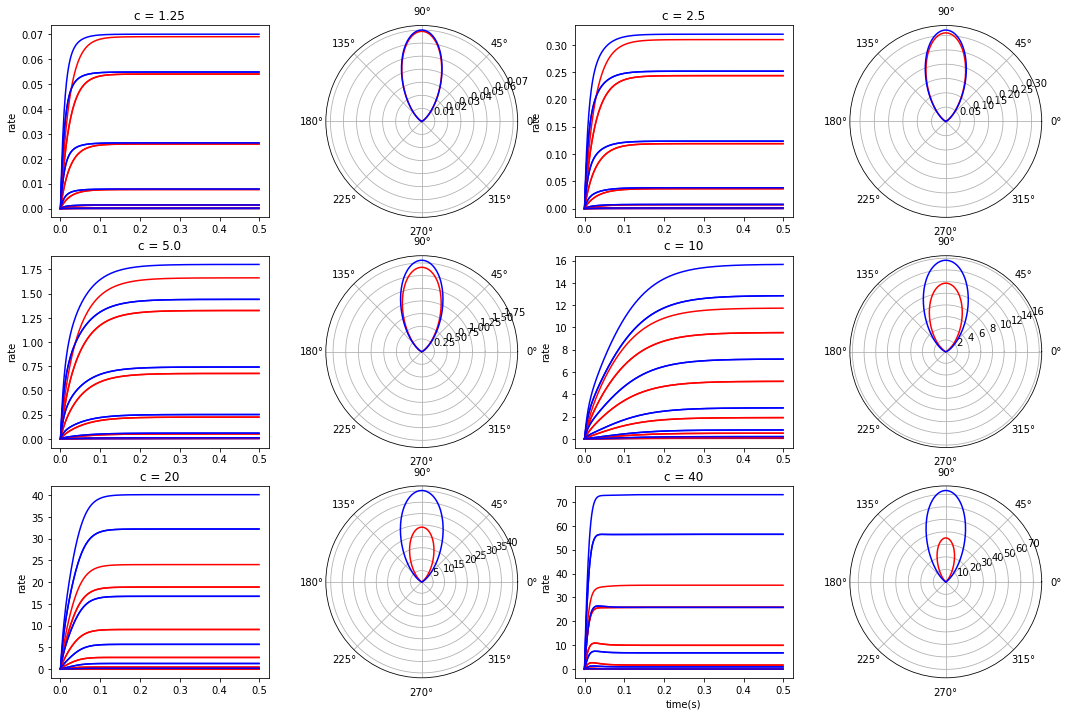

In [ ]:
theta_0 = 90; '''Change this to try other value'''
r_0 = np.zeros(360)
c = [1.25, 2.5, 5, 10, 20, 40]
r_1, I_1 = SSN(c[0], theta_0, r_0)
r_2, I_2 = SSN(c[1], theta_0, r_0)
r_3, I_3 = SSN(c[2], theta_0, r_0)
r_4, I_4 = SSN(c[3], theta_0, r_0)
r_5, I_5 = SSN(c[4], theta_0, r_0)
r_6, I_6 = SSN(c[5], theta_0, r_0)
t = np.arange(0, 0.5, 0.001)
theta = np.arange(0, np.pi, np.pi/180)

fig = plt.figure(figsize=(18,12))
'''Plot for every 15 degrees, RED represents r_E, BLUE represents r_I'''
ax = fig.add_subplot(3,4,1)
for i in range(12):
  ax.plot(t, r_1[15*i, :500], color='r')
  ax.plot(t, r_1[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 1.25')
ax = fig.add_subplot(3,4,2, projection = 'polar')
ax.plot(theta, r_1[:180,500], color='r')
ax.plot(theta, r_1[180:,500], color='b')
ax = fig.add_subplot(3,4,3)
for i in range(12):
  ax.plot(t, r_2[15*i, :500], color='r')
  ax.plot(t, r_2[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 2.5')
ax = fig.add_subplot(3,4,4, projection = 'polar')
ax.plot(theta, r_2[:180,500], color='r')
ax.plot(theta, r_2[180:,500], color='b')
ax = fig.add_subplot(3,4,5)
for i in range(12):
  ax.plot(t, r_3[15*i, :500], color='r')
  ax.plot(t, r_3[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 5.0')
ax = fig.add_subplot(3,4,6, projection = 'polar')
ax.plot(theta, r_3[:180,500], color='r')
ax.plot(theta, r_3[180:,500], color='b')
ax = fig.add_subplot(3,4,7)
for i in range(12):
  ax.plot(t, r_4[15*i, :500], color='r')
  ax.plot(t, r_4[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 10')
ax = fig.add_subplot(3,4,8, projection = 'polar')
ax.plot(theta, r_4[:180,500], color='r')
ax.plot(theta, r_4[180:,500], color='b')
ax = fig.add_subplot(3,4,9)
for i in range(12):
  ax.plot(t, r_5[15*i, :500], color='r')
  ax.plot(t, r_5[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 20')
ax = fig.add_subplot(3,4,10, projection = 'polar')
ax.plot(theta, r_5[:180,500], color='r')
ax.plot(theta, r_5[180:,500], color='b')
ax = fig.add_subplot(3,4,11)
for i in range(12):
  ax.plot(t, r_6[15*i, :500], color='r')
  ax.plot(t, r_6[15*i+180, :500], color='b')
ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax.set_title('c = 40')
ax = fig.add_subplot(3,4,12, projection = 'polar')
ax.plot(theta, r_6[:180,500], color='r')
ax.plot(theta, r_6[180:,500], color='b')
plt.show()

For the steady state, for the E unit and the I unit at the stimulus center, plot, as a function of c:

• Their firing rates: $r_E$ and $r_I$

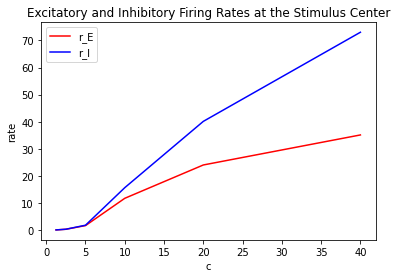

In [ ]:
r_Ess = np.array([r_1[90,-1],r_2[90,-1],r_3[90,-1],r_4[90,-1],r_5[90,-1],r_6[90,-1]])
r_Iss = np.array([r_1[270,-1],r_2[270,-1],r_3[270,-1],r_4[270,-1],r_5[270,-1],r_6[270,-1]])
plt.figure()
plt.plot(c, r_Ess, color='r', label='r_E')
plt.plot(c, r_Iss, color='b', label='r_I')
plt.xlabel('c')
plt.ylabel('rate')
plt.title('Excitatory and Inhibitory Firing Rates at the Stimulus Center')
plt.legend()
plt.show()

• Their feedforward input, their net recurrent input, and their total input

In [ ]:
Jdict = {'EE': 0.044,'IE': 0.042,'EI': -0.023,'II': -0.018}
sigma_h = 30/180 * np.pi
sigma_W = 32/180 * np.pi
Theta = np.zeros([180, 180])
W = []
for k in Jdict.keys():
  W_XY = np.zeros((180, 180))
  for i in range(180):
    for j in range(180):
      Theta[i, j] = np.minimum(np.abs(i-j), 180-np.abs(i-j)) * (np.pi/180)
      W_XY[i,j] = Jdict[k]*np.exp(-Theta[i, j]**2 / (2*(sigma_W)**2))
  W.append(W_XY)
W = np.vstack((
    np.hstack((W[0], W[2])),
    np.hstack((W[1], W[3]))
)) # Alternatively, use np.block()
h = np.zeros((180,6))
I_FF = np.zeros((360,6))
for i in range(6):
  h[:,i] = c[i]*np.exp(-(Theta[:, theta_0]**2)/(2*(sigma_h)**2))
  I_FF[:,i] = np.concatenate((h[:,i], h[:,i]), axis=0)

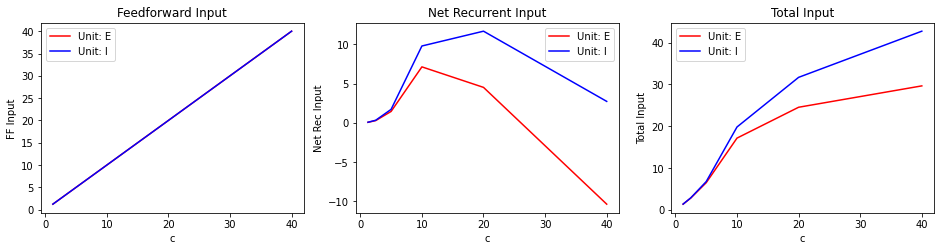

In [ ]:
fig = plt.figure(figsize=(16,3.5))

ax = fig.add_subplot(1,3,1)
I_FF_E = np.array([I_FF[90, 0],I_FF[90, 1],I_FF[90, 2],I_FF[90, 3],I_FF[90, 4],I_FF[90, 5]])
I_FF_I = np.array([I_FF[270, 0],I_FF[270, 1],I_FF[270, 2],I_FF[270, 3],I_FF[270, 4],I_FF[270, 5]])
ax.plot(c, I_FF_E, color='r', label='Unit: E')
ax.plot(c, I_FF_I, color='b', label='Unit: I')
ax.set_xlabel('c')
ax.set_ylabel('FF Input')
ax.set_title('Feedforward Input')
ax.legend()

ax = fig.add_subplot(1,3,2)
I_rec_E = np.array([(W@r_1)[90, -1], (W@r_2)[90, -1],(W@r_3)[90, -1],(W@r_4)[90, -1],(W@r_5)[90, -1],(W@r_6)[90, -1]])
I_rec_I = np.array([(W@r_1)[270, -1], (W@r_2)[270, -1],(W@r_3)[270, -1],(W@r_4)[270, -1],(W@r_5)[270, -1],(W@r_6)[270, -1]])
ax.plot(c, I_rec_E, color='r', label='Unit: E')
ax.plot(c, I_rec_I, color='b', label='Unit: I')
ax.set_xlabel('c')
ax.set_ylabel('Net Rec Input')
ax.set_title('Net Recurrent Input')
ax.legend()


ax = fig.add_subplot(1,3,3)
I_E = np.array([I_1[90],I_2[90],I_3[90],I_4[90],I_5[90],I_6[90]])
I_I = np.array([I_1[270],I_2[270],I_3[270],I_4[270],I_5[270],I_6[270]])
ax.plot(c, I_E, color='r', label='Unit: E')
ax.plot(c, I_I, color='b', label='Unit: I')
ax.set_xlabel('c')
ax.set_ylabel('Total Input')
ax.set_title('Total Input')
ax.legend()
plt.show()

• The percent of the unit’s input that is feedforward or is recurrent

In [ ]:
Jdict = {'EE': 0.044,'IE': 0.042,'EI': 0.023,'II': 0.018}
sigma_h = 30/180 * np.pi
sigma_W = 32/180 * np.pi
Theta = np.zeros([180, 180])
W = []
for k in Jdict.keys():
  W_XY = np.zeros((180, 180))
  for i in range(180):
    for j in range(180):
      Theta[i, j] = np.minimum(np.abs(i-j), 180-np.abs(i-j)) * (np.pi/180)
      W_XY[i,j] = Jdict[k]*np.exp(-Theta[i, j]**2 / (2*(sigma_W)**2))
  W.append(W_XY)
W = np.vstack((np.hstack((W[0], W[2])),np.hstack((W[1], W[3]))))

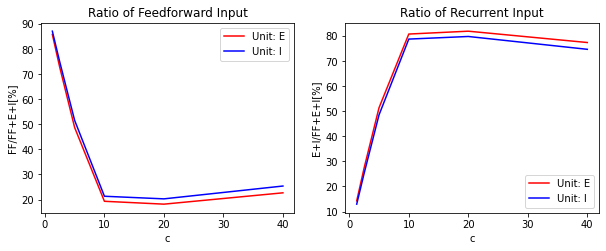

In [ ]:
fig = plt.figure(figsize=(10,3.5))
I_rec_E = np.array([(W@r_1)[90, -1], (W@r_2)[90, -1],(W@r_3)[90, -1],(W@r_4)[90, -1],(W@r_5)[90, -1],(W@r_6)[90, -1]])
I_rec_I = np.array([(W@r_1)[270, -1], (W@r_2)[270, -1],(W@r_3)[270, -1],(W@r_4)[270, -1],(W@r_5)[270, -1],(W@r_6)[270, -1]])
I_E_total = I_FF_E + I_rec_E
I_I_total = I_FF_I + I_rec_I 
ax = fig.add_subplot(1,2,1)
ax.plot(c, I_FF_E/I_E_total*100, color='r', label='Unit: E')
ax.plot(c, I_FF_I/I_I_total*100, color='b', label='Unit: I')
ax.set_xlabel('c')
ax.set_ylabel('FF/FF+E+I[%]')
ax.set_title('Ratio of Feedforward Input')
ax.legend()
ax = fig.add_subplot(1,2,2)
ax.plot(c, I_rec_E/I_E_total*100, color='r', label='Unit: E')
ax.plot(c, I_rec_I/I_I_total*100, color='b', label='Unit: I')
ax.set_xlabel('c')
ax.set_ylabel('E+I/FF+E+I[%]')
ax.set_title('Ratio of Recurrent Input')
ax.legend()
ax.legend()
plt.show()

• For the recurrent input, the percent of it that is excitatory: $\frac{E}{E+I}$

In [ ]:
Jdict = {'EE': 0.044,'IE': 0.042,'EI': -0.023,'II': -0.018}
sigma_h = 30/180 * np.pi
sigma_W = 32/180 * np.pi
Theta = np.zeros([180, 180])
W = []
for k in Jdict.keys():
  W_XY = np.zeros((180, 180))
  for i in range(180):
    for j in range(180):
      Theta[i, j] = np.minimum(np.abs(i-j), 180-np.abs(i-j)) * (np.pi/180)
      W_XY[i,j] = Jdict[k]*np.exp(-Theta[i, j]**2 / (2*(sigma_W)**2))
  W.append(W_XY)
W = np.vstack((np.hstack((W[0], W[2])),np.hstack((W[1], W[3]))))

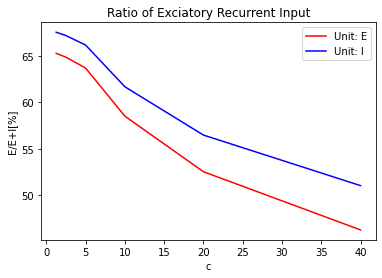

In [ ]:
I_rec_net_E = np.array([(W@r_1)[90, -1], (W@r_2)[90, -1],(W@r_3)[90, -1],(W@r_4)[90, -1],(W@r_5)[90, -1],(W@r_6)[90, -1]])
I_rec_net_I = np.array([(W@r_1)[270, -1], (W@r_2)[270, -1],(W@r_3)[270, -1],(W@r_4)[270, -1],(W@r_5)[270, -1],(W@r_6)[270, -1]])
plt.figure()
plt.plot(c, (I_rec_net_E+I_rec_E)/(2*I_rec_E)*100, color='r', label='Unit: E')
plt.plot(c, (I_rec_net_I+I_rec_E)/(2*I_rec_E)*100, color='b', label='Unit: I')
plt.xlabel('c')
plt.ylabel('E/E+I[%]')
plt.title('Ratio of Exciatory Recurrent Input')
plt.legend()
plt.show()

I observed: the saturation of excitatory firing rates; a transition from a
feedforward-dominated regime for weak input, \
to a recurrent-dominated regime for
stronger input; for stronger input, the recurrent input largely cancels or
‘balances’ \
the feedforward input; and the recurrent input becomes more inhibition-dominated for stronger stimuli.

##### b-1. Simulate response to the two stimuli shown at the same time for the given values of c (same c for both stimuli)

In [ ]:
def SSN(c, theta_0, r_0):
  r_E = np.zeros([180,1000])
  r_I = np.zeros([180,1000])
  r = np.concatenate((r_E, r_I), axis=0)
  r[:, 0] = r_0
  Jdict = {'EE': 0.044,'IE': 0.042,'EI': -0.023,'II': -0.018} # Attention to the minus sign!
  sigma_W = 32/180 * np.pi
  sigma_h = 30/180 * np.pi
  tau_E = 0.02 # tau_E = 20ms
  dt = 0.001 # dt = 1ms
  theta = np.arange(0, 180, 1)
  Theta = np.zeros([180, 180])
  W = []
  for k in Jdict.keys():
    W_XY = np.zeros((180, 180))
    for i in range(180):
      for j in range(180):
        Theta[i, j] = np.minimum(np.abs(i-j), 180-np.abs(i-j)) * (np.pi/180)
        W_XY[i,j] = Jdict[k]*np.exp(-Theta[i, j]**2 / (2*(sigma_W)**2))
    W.append(W_XY)
  W = np.vstack((
      np.hstack((W[0], W[2])),
      np.hstack((W[1], W[3]))
  )) # Alternatively, use np.block()
  T = np.diag(180*[1] + 180*[1/2])
  T_inv = np.linalg.inv(T)
  h_1 = c*np.exp(-(Theta[:, theta_0]**2)/(2*(sigma_h)**2))
  h_1 = np.concatenate((h_1, h_1), axis=0)
  h_2 = c*np.exp(-(Theta[:, theta_0+90]**2)/(2*(sigma_h)**2))
  h_2 = np.concatenate((h_2, h_2), axis=0)
  k = 0.04
  n = 2
  for i in range(1000-1):
    # Calculate dr/dt
    I = W @ r[:,i] + h_1 + h_2
    y = np.maximum(I, np.zeros(360))
    drdt = (1/tau_E) * T_inv @ (-r[:, i] + k*(y**n))
    # Update V with Euler Method
    r[:, i+1] = r[:, i] + drdt * dt
  return r, I

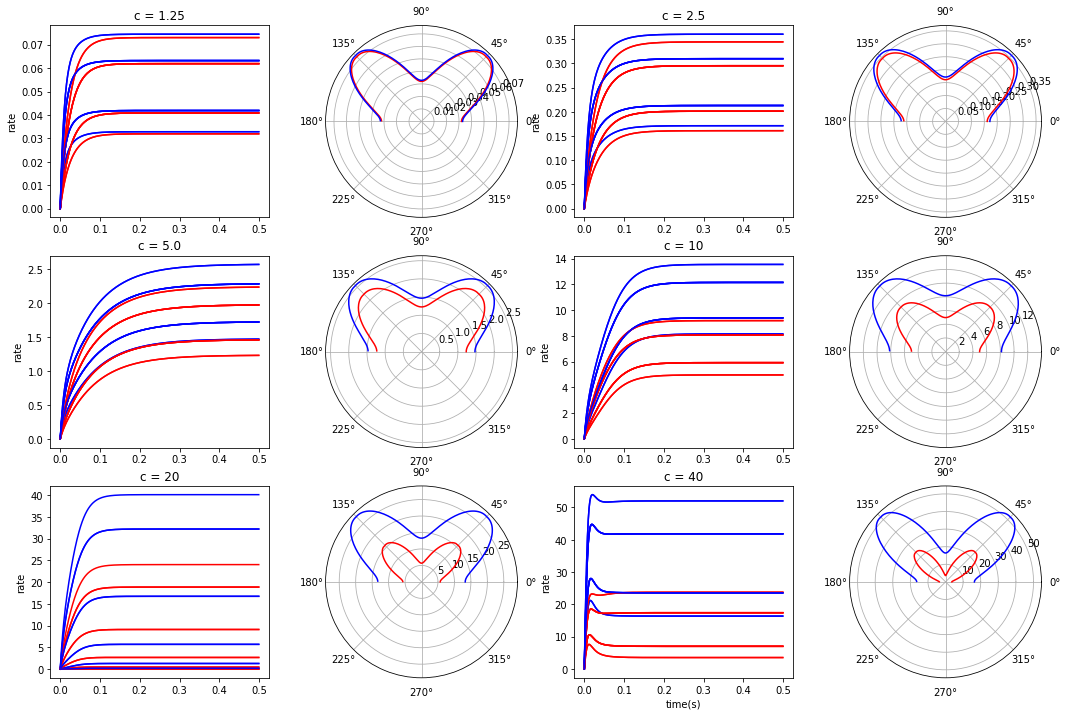

In [ ]:
theta_0 = 45; '''Change this to try other value'''
r_0 = np.zeros(360)
c = [1.25, 2.5, 5, 10, 20, 40]
r2_1, I2_1 = SSN(c[0], theta_0, r_0)
r2_2, I2_2 = SSN(c[1], theta_0, r_0)
r2_3, I2_3 = SSN(c[2], theta_0, r_0)
r2_4, I2_4 = SSN(c[3], theta_0, r_0)
r2_5, I2_5 = SSN(c[4], theta_0, r_0)
r2_6, I2_6 = SSN(c[5], theta_0, r_0)
t = np.arange(0, 0.5, 0.001)
theta = np.arange(0, np.pi, np.pi/180)
fig = plt.figure(figsize=(18,12)) # Plot for every 15 degrees
ax = fig.add_subplot(3,4,1)
for i in range(12):
  ax.plot(t, r2_1[15*i, :500], color='r')
  ax.plot(t, r2_1[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 1.25')
ax = fig.add_subplot(3,4,2, projection = 'polar')
ax.plot(theta, r2_1[:180,500], color='r')
ax.plot(theta, r2_1[180:,500], color='b')
ax = fig.add_subplot(3,4,3)
for i in range(12):
  ax.plot(t, r2_2[15*i, :500], color='r')
  ax.plot(t, r2_2[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 2.5')
ax = fig.add_subplot(3,4,4, projection = 'polar')
ax.plot(theta, r2_2[:180,500], color='r')
ax.plot(theta, r2_2[180:,500], color='b')
ax = fig.add_subplot(3,4,5)
for i in range(12):
  ax.plot(t, r2_3[15*i, :500], color='r')
  ax.plot(t, r2_3[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 5.0')
ax = fig.add_subplot(3,4,6, projection = 'polar')
ax.plot(theta, r2_3[:180,500], color='r')
ax.plot(theta, r2_3[180:,500], color='b')
ax = fig.add_subplot(3,4,7)
for i in range(12):
  ax.plot(t, r2_4[15*i, :500], color='r')
  ax.plot(t, r2_4[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 10')
ax = fig.add_subplot(3,4,8, projection = 'polar')
ax.plot(theta, r2_4[:180,500], color='r')
ax.plot(theta, r2_4[180:,500], color='b')
ax = fig.add_subplot(3,4,9)
for i in range(12):
  ax.plot(t, r_5[15*i, :500], color='r')
  ax.plot(t, r_5[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 20')
ax = fig.add_subplot(3,4,10, projection = 'polar')
ax.plot(theta, r2_5[:180,500], color='r')
ax.plot(theta, r2_5[180:,500], color='b')
ax = fig.add_subplot(3,4,11)
for i in range(12):
  ax.plot(t, r2_6[15*i, :500], color='r')
  ax.plot(t, r2_6[15*i+180, :500], color='b')

ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax.set_title('c = 40')
ax = fig.add_subplot(3,4,12, projection = 'polar')
ax.plot(theta, r2_6[:180,500], color='r')
ax.plot(theta, r2_6[180:,500], color='b')
plt.show()

##### b-2. Plot the ratio of their steady-state response when both stimuli are shown together to that when only one stimulus is shown

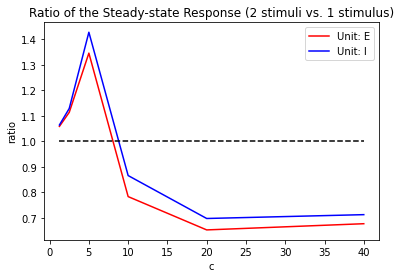

In [ ]:
r2_Ess = np.array([r2_1[45,-1],r2_2[45,-1],r2_3[45,-1],r2_4[45,-1],r2_5[45,-1],r2_6[45,-1]])
r2_Iss = np.array([r2_1[225,-1],r2_2[225,-1],r2_3[225,-1],r2_4[225,-1],r2_5[225,-1],r2_6[225,-1]])
plt.figure()
plt.plot(c, r2_Ess/r_Ess, color='r', label='Unit: E')
plt.plot(c, r2_Iss/r_Iss, color='b', label='Unit: I')
plt.plot(c, np.ones(6), color='k', linestyle='--')
plt.xlabel('c')
plt.ylabel('ratio')
plt.title('Ratio of the Steady-state Response (2 stimuli vs. 1 stimulus)')
plt.legend()
plt.show()

I found this ratio is > 1, representing supralinear summation, for weaker inputs but < 1,
representing sublinear summation, for stronger inputs.

##### c. Plot curves of E and I unit responses vs. position x on the ring

In [ ]:
theta_0 = 45; '''Change this to try other value'''
r_0 = np.zeros(360)
c = [1.25, 2.5, 5, 10, 20, 40]
r0_1, I0_1 = SSN(c[0], theta_0, r_0)
r0_2, I0_2 = SSN(c[1], theta_0, r_0)
r0_3, I0_3 = SSN(c[2], theta_0, r_0)
r0_4, I0_4 = SSN(c[3], theta_0, r_0)
r0_5, I0_5 = SSN(c[4], theta_0, r_0)
r0_6, I0_6 = SSN(c[5], theta_0, r_0)

theta_0 = 135; '''Change this to try other value'''
r_0 = np.zeros(360)
c = [1.25, 2.5, 5, 10, 20, 40]
r1_1, I1_1 = SSN(c[0], theta_0, r_0)
r1_2, I1_2 = SSN(c[1], theta_0, r_0)
r1_3, I1_3 = SSN(c[2], theta_0, r_0)
r1_4, I1_4 = SSN(c[3], theta_0, r_0)
r1_5, I1_5 = SSN(c[4], theta_0, r_0)
r1_6, I1_6 = SSN(c[5], theta_0, r_0)

t = np.arange(0, 0.5, 0.001)
theta = np.arange(0, np.pi, np.pi/180)

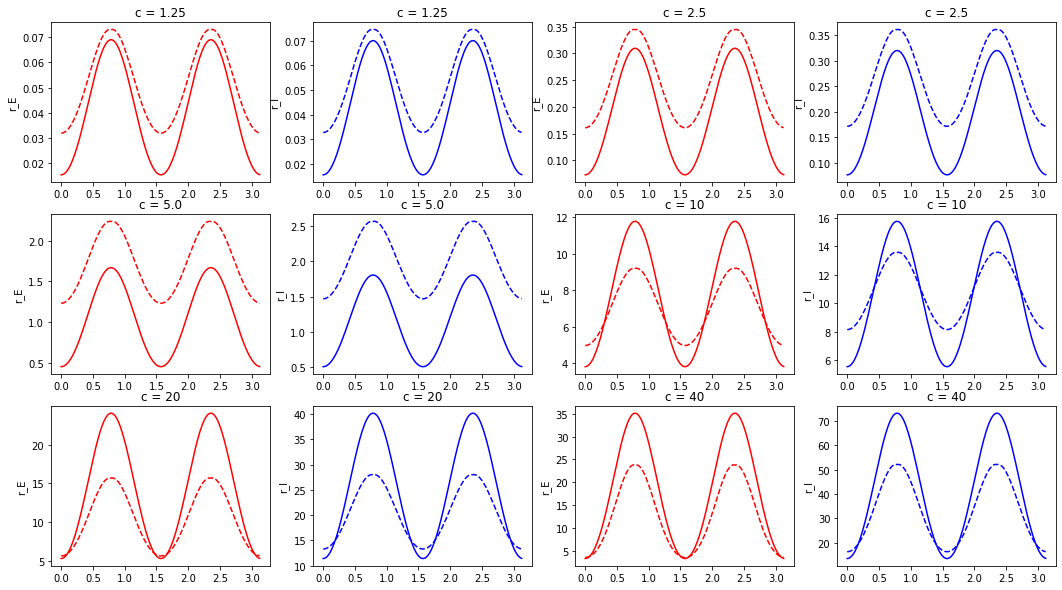

In [ ]:
fig = plt.figure(figsize=(18,10)) #RED represents r_E, BLUE represents r_I
ax = fig.add_subplot(3,4,1)
ax.plot(theta, r0_1[:180,500]+r1_1[:180,500], c='r')
ax.plot(theta, r2_1[:180,500], c='r', ls='--')
ax.set_ylabel('r_E')
ax.set_title('c = 1.25')
ax = fig.add_subplot(3,4,2)
ax.plot(theta, r0_1[180:,500]+r1_1[180:,500], c='b')
ax.plot(theta, r2_1[180:,500], c='b', ls='--')
ax.set_ylabel('r_I')
ax.set_title('c = 1.25')

ax = fig.add_subplot(3,4,3)
ax.plot(theta, r0_2[:180,500]+r1_2[:180,500], c='r')
ax.plot(theta, r2_2[:180,500], c='r', ls='--')
ax.set_ylabel('r_E')
ax.set_title('c = 2.5')
ax = fig.add_subplot(3,4,4)
ax.plot(theta, r0_2[180:,500]+r1_2[180:,500], c='b')
ax.plot(theta, r2_2[180:,500], c='b', ls='--')
ax.set_ylabel('r_I')
ax.set_title('c = 2.5')

ax = fig.add_subplot(3,4,5)
ax.plot(theta, r0_3[:180,500]+r1_3[:180,500], c='r')
ax.plot(theta, r2_3[:180,500], c='r', ls='--')
ax.set_ylabel('r_E')
ax.set_title('c = 5.0')
ax = fig.add_subplot(3,4,6)
ax.plot(theta, r0_3[180:,500]+r1_3[180:,500], c='b')
ax.plot(theta, r2_3[180:,500], c='b', ls='--')
ax.set_ylabel('r_I')
ax.set_title('c = 5.0')

ax = fig.add_subplot(3,4,7)
ax.plot(theta, r0_4[:180,500]+r1_4[:180,500], c='r')
ax.plot(theta, r2_4[:180,500], c='r', ls='--')
ax.set_ylabel('r_E')
ax.set_title('c = 10')
ax = fig.add_subplot(3,4,8)
ax.plot(theta, r0_4[180:,500]+r1_4[180:,500], c='b')
ax.plot(theta, r2_4[180:,500], c='b', ls='--')
ax.set_ylabel('r_I')
ax.set_title('c = 10')

ax = fig.add_subplot(3,4,9)
ax.plot(theta, r0_5[:180,500]+r1_5[:180,500], c='r')
ax.plot(theta, r2_5[:180,500], c='r', ls='--')
ax.set_ylabel('r_E')
ax.set_title('c = 20')


ax = fig.add_subplot(3,4,10)
ax.plot(theta, r0_5[180:,500]+r1_5[180:,500], c='b')
ax.plot(theta, r2_5[180:,500], c='b', ls='--')
ax.set_ylabel('r_I')
ax.set_title('c = 20')

ax = fig.add_subplot(3,4,11)
ax.plot(theta, r0_6[:180,500]+r1_6[:180,500], c='r')
ax.plot(theta, r2_6[:180,500], c='r', ls='--')
ax.set_ylabel('r_E')
ax.set_title('c = 40')
ax = fig.add_subplot(3,4,12)
ax.plot(theta, r0_6[180:,500]+r1_6[180:,500], c='b')
ax.plot(theta, r2_6[180:,500], c='b', ls='--')
ax.set_ylabel('r_I')
ax.set_title('c = 40')
plt.show()

Now, we can directly observe the supralinear and sublinear summation.

##### Additional (Optional) Question 1: Give a uniform input of varying strengths to the network

In [ ]:
def SSN(c, theta_0, r_0):
  r_E = np.zeros([180,1000])
  r_I = np.zeros([180,1000])
  r = np.concatenate((r_E, r_I), axis=0)
  r[:, 0] = r_0
  Jdict = {'EE': 0.044,'IE': 0.042,'EI': -0.023,'II': -0.018} # Attention to the minus sign!
  sigma_W = 32/180 * np.pi
  sigma_h = 30/180 * np.pi
  tau_E = 0.02 # tau_E = 20ms
  dt = 0.001 # dt = 1ms
  theta = np.arange(0, 180, 1)
  Theta = np.zeros([180, 180])
  W = []
  for k in Jdict.keys():
    W_XY = np.zeros((180, 180))
    for i in range(180):
      for j in range(180):
        Theta[i, j] = np.minimum(np.abs(i-j), 180-np.abs(i-j)) * (np.pi/180)
        W_XY[i,j] = Jdict[k]*np.exp(-Theta[i, j]**2 / (2*(sigma_W)**2))
    W.append(W_XY)
  W = np.vstack((
      np.hstack((W[0], W[2])),
      np.hstack((W[1], W[3]))
  )) # Alternatively, use np.block()
  T = np.diag(180*[1] + 180*[1/2])
  T_inv = np.linalg.inv(T)
  h = c*0.5*np.ones(180) # Choose h=0.5c
  h = np.concatenate((h, h), axis=0)
  k = 0.04
  n = 2
  for i in range(1000-1):
    # Calculate dr/dt
    I = W @ r[:,i] + h
    y = np.maximum(I, np.zeros(360))
    drdt = (1/tau_E) * T_inv @ (-r[:, i] + k*(y**n))
    # Update V with Euler Method
    r[:, i+1] = r[:, i] + drdt * dt
  return r, I

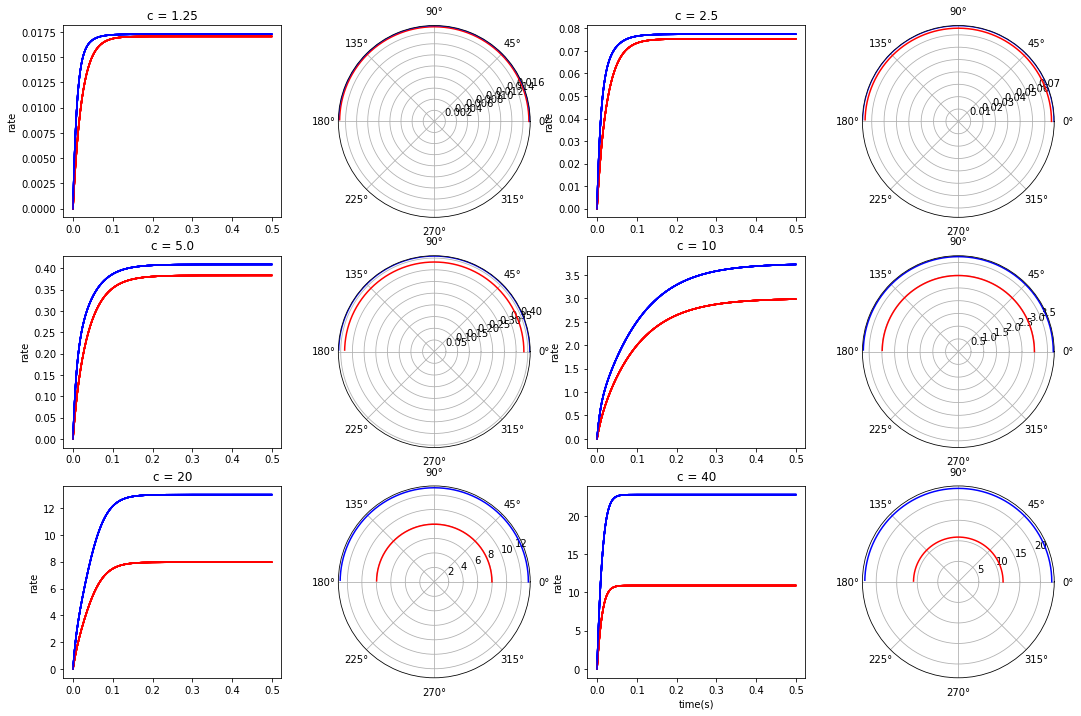

In [ ]:
theta_0 = 90; '''Change this to try other value'''
r_0 = np.zeros(360)
c = [1.25, 2.5, 5, 10, 20, 40]
r_1, I_1 = SSN(c[0], theta_0, r_0)
r_2, I_2 = SSN(c[1], theta_0, r_0)
r_3, I_3 = SSN(c[2], theta_0, r_0)
r_4, I_4 = SSN(c[3], theta_0, r_0)
r_5, I_5 = SSN(c[4], theta_0, r_0)
r_6, I_6 = SSN(c[5], theta_0, r_0)
t = np.arange(0, 0.5, 0.001)
theta = np.arange(0, np.pi, np.pi/180)

fig = plt.figure(figsize=(18,12))
'''Plot for every 15 degrees, RED represents r_E, BLUE represents r_I'''
ax = fig.add_subplot(3,4,1)
for i in range(12):
  ax.plot(t, r_1[15*i, :500], color='r')
  ax.plot(t, r_1[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 1.25')
ax = fig.add_subplot(3,4,2, projection = 'polar')
ax.plot(theta, r_1[:180,500], color='r')
ax.plot(theta, r_1[180:,500], color='b')
ax = fig.add_subplot(3,4,3)
for i in range(12):
  ax.plot(t, r_2[15*i, :500], color='r')
  ax.plot(t, r_2[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 2.5')
ax = fig.add_subplot(3,4,4, projection = 'polar')
ax.plot(theta, r_2[:180,500], color='r')
ax.plot(theta, r_2[180:,500], color='b')
ax = fig.add_subplot(3,4,5)
for i in range(12):
  ax.plot(t, r_3[15*i, :500], color='r')
  ax.plot(t, r_3[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 5.0')
ax = fig.add_subplot(3,4,6, projection = 'polar')
ax.plot(theta, r_3[:180,500], color='r')
ax.plot(theta, r_3[180:,500], color='b')
ax = fig.add_subplot(3,4,7)
for i in range(12):
  ax.plot(t, r_4[15*i, :500], color='r')
  ax.plot(t, r_4[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 10')
ax = fig.add_subplot(3,4,8, projection = 'polar')
ax.plot(theta, r_4[:180,500], color='r')
ax.plot(theta, r_4[180:,500], color='b')
ax = fig.add_subplot(3,4,9)
for i in range(12):
  ax.plot(t, r_5[15*i, :500], color='r')
  ax.plot(t, r_5[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c = 20')
ax = fig.add_subplot(3,4,10, projection = 'polar')
ax.plot(theta, r_5[:180,500], color='r')
ax.plot(theta, r_5[180:,500], color='b')
ax = fig.add_subplot(3,4,11)
for i in range(12):
  ax.plot(t, r_6[15*i, :500], color='r')
  ax.plot(t, r_6[15*i+180, :500], color='b')
ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax.set_title('c = 40')
ax = fig.add_subplot(3,4,12, projection = 'polar')
ax.plot(theta, r_6[:180,500], color='r')
ax.plot(theta, r_6[180:,500], color='b')
plt.show()

I did not see non-uniform solutions emerge.

##### Additional (Optional) Question 2: Consider adding the two stimuli with different c values

In [ ]:
def SSN(c1, c2, theta_0, r_0):
  r_E = np.zeros([180,1000])
  r_I = np.zeros([180,1000])
  r = np.concatenate((r_E, r_I), axis=0)
  r[:, 0] = r_0
  Jdict = {'EE': 0.044,'IE': 0.042,'EI': -0.023,'II': -0.018} # Attention to the minus sign!
  sigma_W = 32/180 * np.pi
  sigma_h = 30/180 * np.pi
  tau_E = 0.02 # tau_E = 20ms
  dt = 0.001 # dt = 1ms
  theta = np.arange(0, 180, 1)
  Theta = np.zeros([180, 180])
  W = []
  for k in Jdict.keys():
    W_XY = np.zeros((180, 180))
    for i in range(180):
      for j in range(180):
        Theta[i, j] = np.minimum(np.abs(i-j), 180-np.abs(i-j)) * (np.pi/180)
        W_XY[i,j] = Jdict[k]*np.exp(-Theta[i, j]**2 / (2*(sigma_W)**2))
    W.append(W_XY)
  W = np.vstack((
      np.hstack((W[0], W[2])),
      np.hstack((W[1], W[3]))
  )) # Alternatively, use np.block()
  T = np.diag(180*[1] + 180*[1/2])
  T_inv = np.linalg.inv(T)
  h_1 = c1*np.exp(-(Theta[:, theta_0]**2)/(2*(sigma_h)**2))
  h_1 = np.concatenate((h_1, h_1), axis=0)
  h_2 = c2*np.exp(-(Theta[:, theta_0+90]**2)/(2*(sigma_h)**2))
  h_2 = np.concatenate((h_2, h_2), axis=0)
  k = 0.04
  n = 2
  for i in range(1000-1):
    # Calculate dr/dt
    I = W @ r[:,i] + h_1 + h_2
    y = np.maximum(I, np.zeros(360))
    drdt = (1/tau_E) * T_inv @ (-r[:, i] + k*(y**n))
    # Update V with Euler Method
    r[:, i+1] = r[:, i] + drdt * dt
  return r, I

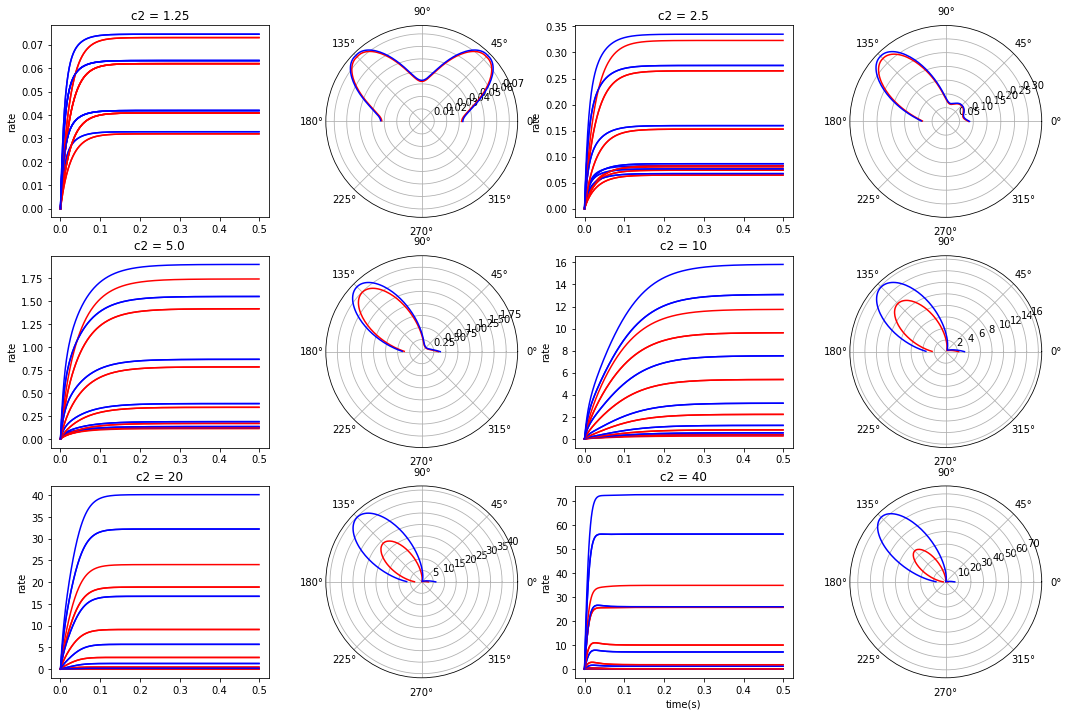

In [ ]:
theta_0 = 45; '''Change this to try other value'''
r_0 = np.zeros(360)
c = [1.25, 2.5, 5, 10, 20, 40] #c2
r2_1, I2_1 = SSN(1.25, c[0], theta_0, r_0)
r2_2, I2_2 = SSN(1.25, c[1], theta_0, r_0)
r2_3, I2_3 = SSN(1.25, c[2], theta_0, r_0)
r2_4, I2_4 = SSN(1.25, c[3], theta_0, r_0)
r2_5, I2_5 = SSN(1.25, c[4], theta_0, r_0)
r2_6, I2_6 = SSN(1.25, c[5], theta_0, r_0)
t = np.arange(0, 0.5, 0.001)
theta = np.arange(0, np.pi, np.pi/180)
fig = plt.figure(figsize=(18,12)) # Plot for every 15 degrees
ax = fig.add_subplot(3,4,1)
for i in range(12):
  ax.plot(t, r2_1[15*i, :500], color='r')
  ax.plot(t, r2_1[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c2 = 1.25')
ax = fig.add_subplot(3,4,2, projection = 'polar')
ax.plot(theta, r2_1[:180,500], color='r')
ax.plot(theta, r2_1[180:,500], color='b')
ax = fig.add_subplot(3,4,3)
for i in range(12):
  ax.plot(t, r2_2[15*i, :500], color='r')
  ax.plot(t, r2_2[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c2 = 2.5')
ax = fig.add_subplot(3,4,4, projection = 'polar')
ax.plot(theta, r2_2[:180,500], color='r')
ax.plot(theta, r2_2[180:,500], color='b')
ax = fig.add_subplot(3,4,5)
for i in range(12):
  ax.plot(t, r2_3[15*i, :500], color='r')
  ax.plot(t, r2_3[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c2 = 5.0')
ax = fig.add_subplot(3,4,6, projection = 'polar')
ax.plot(theta, r2_3[:180,500], color='r')
ax.plot(theta, r2_3[180:,500], color='b')
ax = fig.add_subplot(3,4,7)
for i in range(12):
  ax.plot(t, r2_4[15*i, :500], color='r')
  ax.plot(t, r2_4[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c2 = 10')
ax = fig.add_subplot(3,4,8, projection = 'polar')
ax.plot(theta, r2_4[:180,500], color='r')
ax.plot(theta, r2_4[180:,500], color='b')
ax = fig.add_subplot(3,4,9)
for i in range(12):
  ax.plot(t, r_5[15*i, :500], color='r')
  ax.plot(t, r_5[15*i+180, :500], color='b')
ax.set_ylabel('rate')
ax.set_title('c2 = 20')
ax = fig.add_subplot(3,4,10, projection = 'polar')
ax.plot(theta, r2_5[:180,500], color='r')
ax.plot(theta, r2_5[180:,500], color='b')
ax = fig.add_subplot(3,4,11)
for i in range(12):
  ax.plot(t, r2_6[15*i, :500], color='r')
  ax.plot(t, r2_6[15*i+180, :500], color='b')

ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax.set_title('c2 = 40')
ax = fig.add_subplot(3,4,12, projection = 'polar')
ax.plot(theta, r2_6[:180,500], color='r')
ax.plot(theta, r2_6[180:,500], color='b')
plt.show()

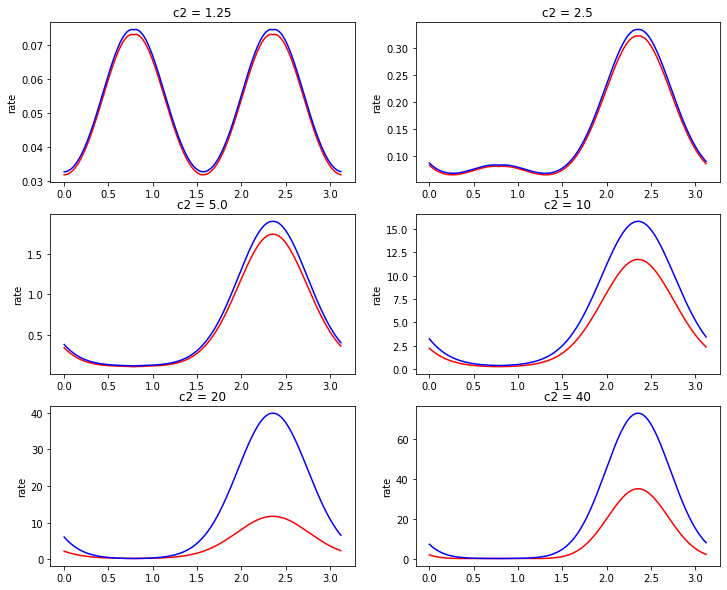

In [ ]:
fig = plt.figure(figsize=(12,10)) #RED represents r_E, BLUE represents r_I
ax = fig.add_subplot(3,2,1)
ax.plot(theta, r2_1[:180,500], c='r')
ax.plot(theta, r2_1[180:,500], c='b')
ax.set_ylabel('rate')
ax.set_title('c2 = 1.25')

ax = fig.add_subplot(3,2,2)
ax.plot(theta, r2_2[:180,500], c='r')
ax.plot(theta, r2_2[180:,500], c='b')
ax.set_ylabel('rate')
ax.set_title('c2 = 2.5')

ax = fig.add_subplot(3,2,3)
ax.plot(theta, r2_3[:180,500], c='r')
ax.plot(theta, r2_3[180:,500], c='b')
ax.set_ylabel('rate')
ax.set_title('c2 = 5.0')

ax = fig.add_subplot(3,2,4)
ax.plot(theta, r2_4[:180,500], c='r')
ax.plot(theta, r2_4[180:,500], c='b')
ax.set_ylabel('rate')
ax.set_title('c2 = 10')

ax = fig.add_subplot(3,2,5)
ax.plot(theta, r2_4[:180,500], c='r')
ax.plot(theta, r2_5[180:,500], c='b')
ax.set_ylabel('rate')
ax.set_title('c2 = 20')

ax = fig.add_subplot(3,2,6)
ax.plot(theta, r2_6[:180,500], c='r')
ax.plot(theta, r2_6[180:,500], c='b')
ax.set_ylabel('rate')
ax.set_title('c2 = 40')
plt.show()

I saw the emergence of "winner-take-all" behavior, where the greater the difference between the c values for the two stimuli, the more the response to the weaker stimulus is suppressed and the more the response to the stronger stimulus approaches the response shown by itself.

All plots match what we have in the paper attached below.

**Reference:**

Rubin, D.B., Van Hooser, S.D.  and Miller, K.D. (2015). The Stabilized Supralinear Network: A Unifying Ciruit Motif Underlying Multi-Input Integration in Sensory Cortex. Neuron 85, 402-417. URL: https://www.sciencedirect.com/science/article/pii/S0896627314011350

Ahmadian, Y., Rubin D.B., Miller, K.D. (2013). Analysis of the Stabilized Supralinear Network. Neural Computation, 2013 Aug; 25(8): 1994–2037. doi:10.1162/NECO_a_00472. URL: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4026108/

Neuromatch Academy Tutorials: https://compneuro.neuromatch.io/tutorials/W2D4_DynamicNetworks/W2D4_Outro.html
